In [18]:
#importing libraries

import sys
sys.path.append("../")

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Env.ProjectPaths import TEST_PATH
from Env.Constants import DS_JOBS, MY_COLORS
from scipy import stats




In [6]:

h1bdata_df = pd.read_csv(TEST_PATH + "H1BDATA_preprocessed_data.csv")

In [7]:
h1bdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78655 entries, 0 to 78654
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    78655 non-null  int64  
 1   Unnamed: 0.1  78655 non-null  int64  
 2   company       78655 non-null  object 
 3   title         78655 non-null  object 
 4   salary        78655 non-null  float64
 5   date          78655 non-null  object 
 6   city          78653 non-null  object 
 7   state         78655 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 4.8+ MB


(0.0, 250000.0)

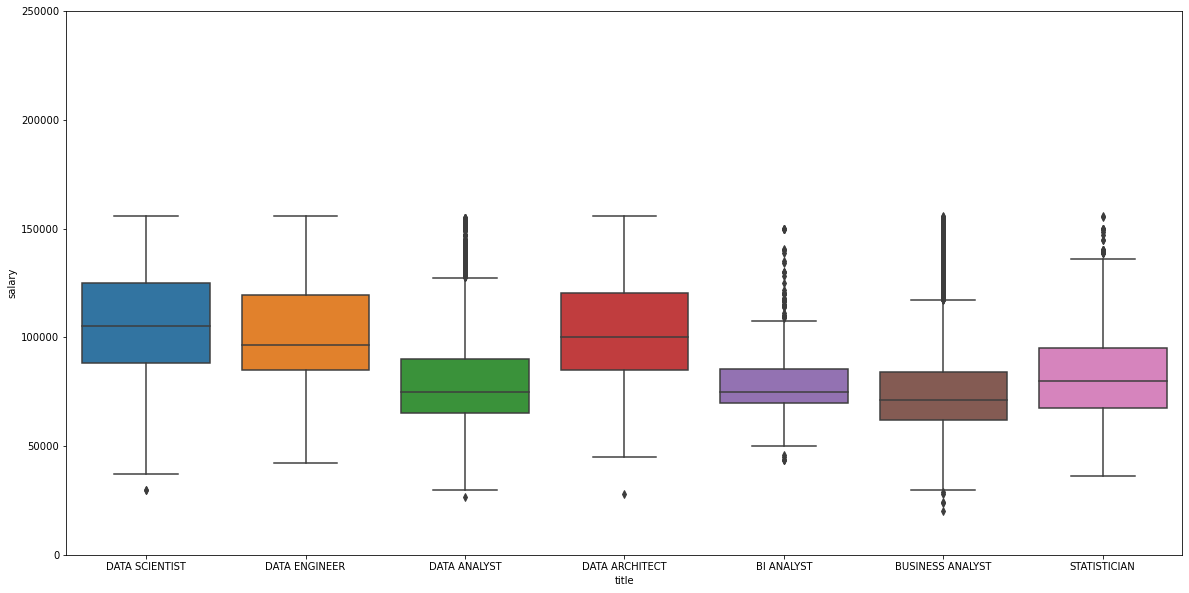

In [10]:

fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')


sns.boxplot(data=h1bdata_df, y="salary",x='title')
plt.ylim([0,2.5e5])

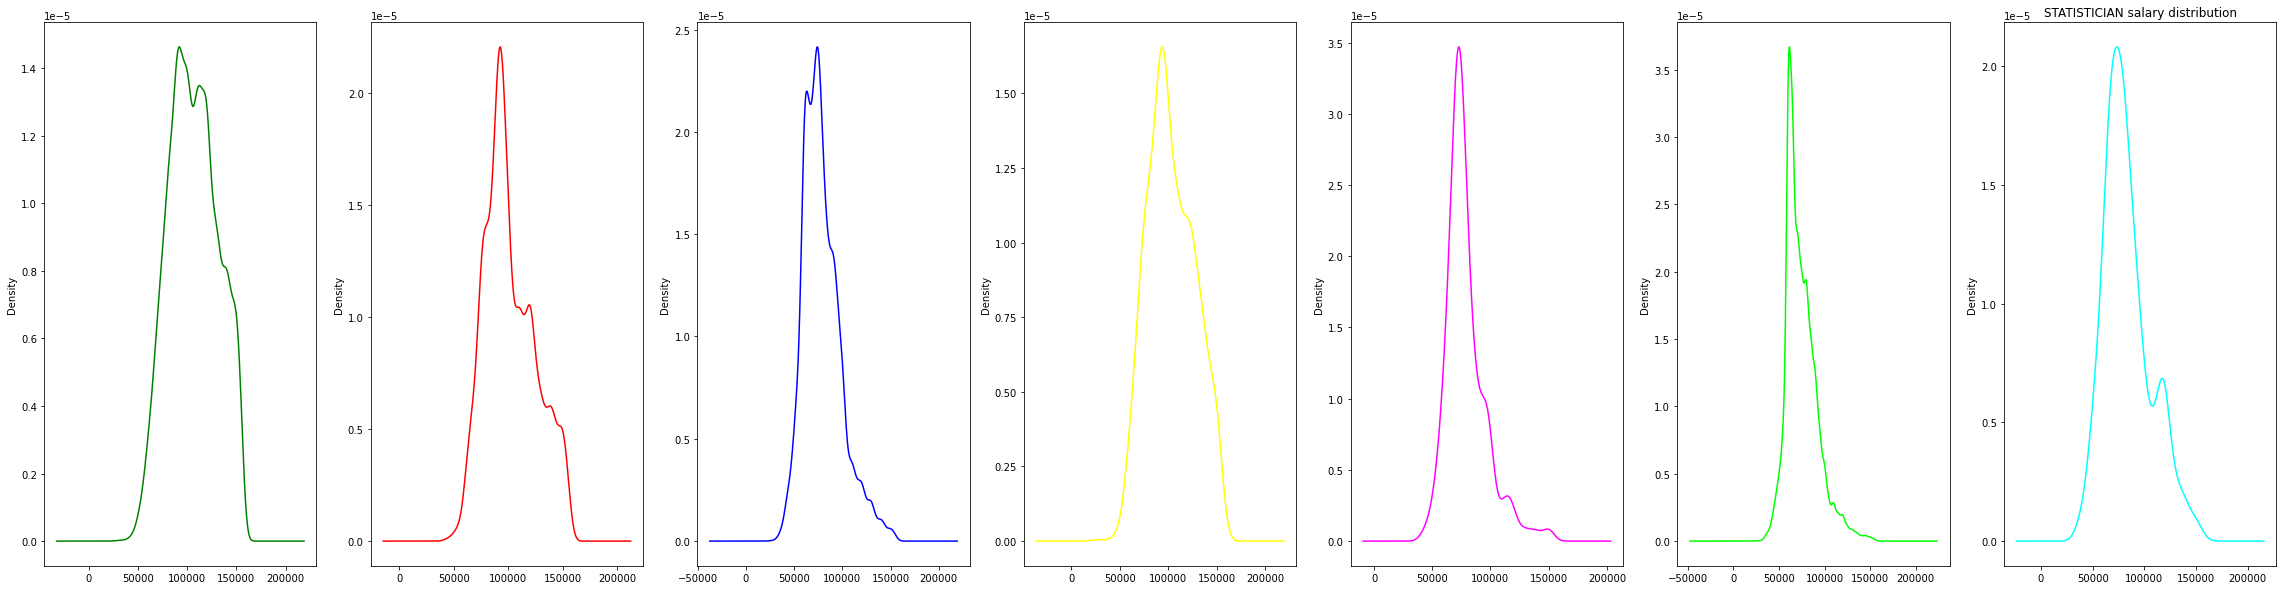

In [19]:


fig, axs = plt.subplots(1,7, figsize=(40,10))
fig.set_facecolor('white')
for (i,job) in zip(range(0, len(DS_JOBS) ), DS_JOBS):
  tmp_df = h1bdata_df[ h1bdata_df['title']== job ]['salary']
  tmp_df.plot(kind='density', ax= axs[i],color=MY_COLORS[i])
  plt.title(f"{job} salary distribution")
 

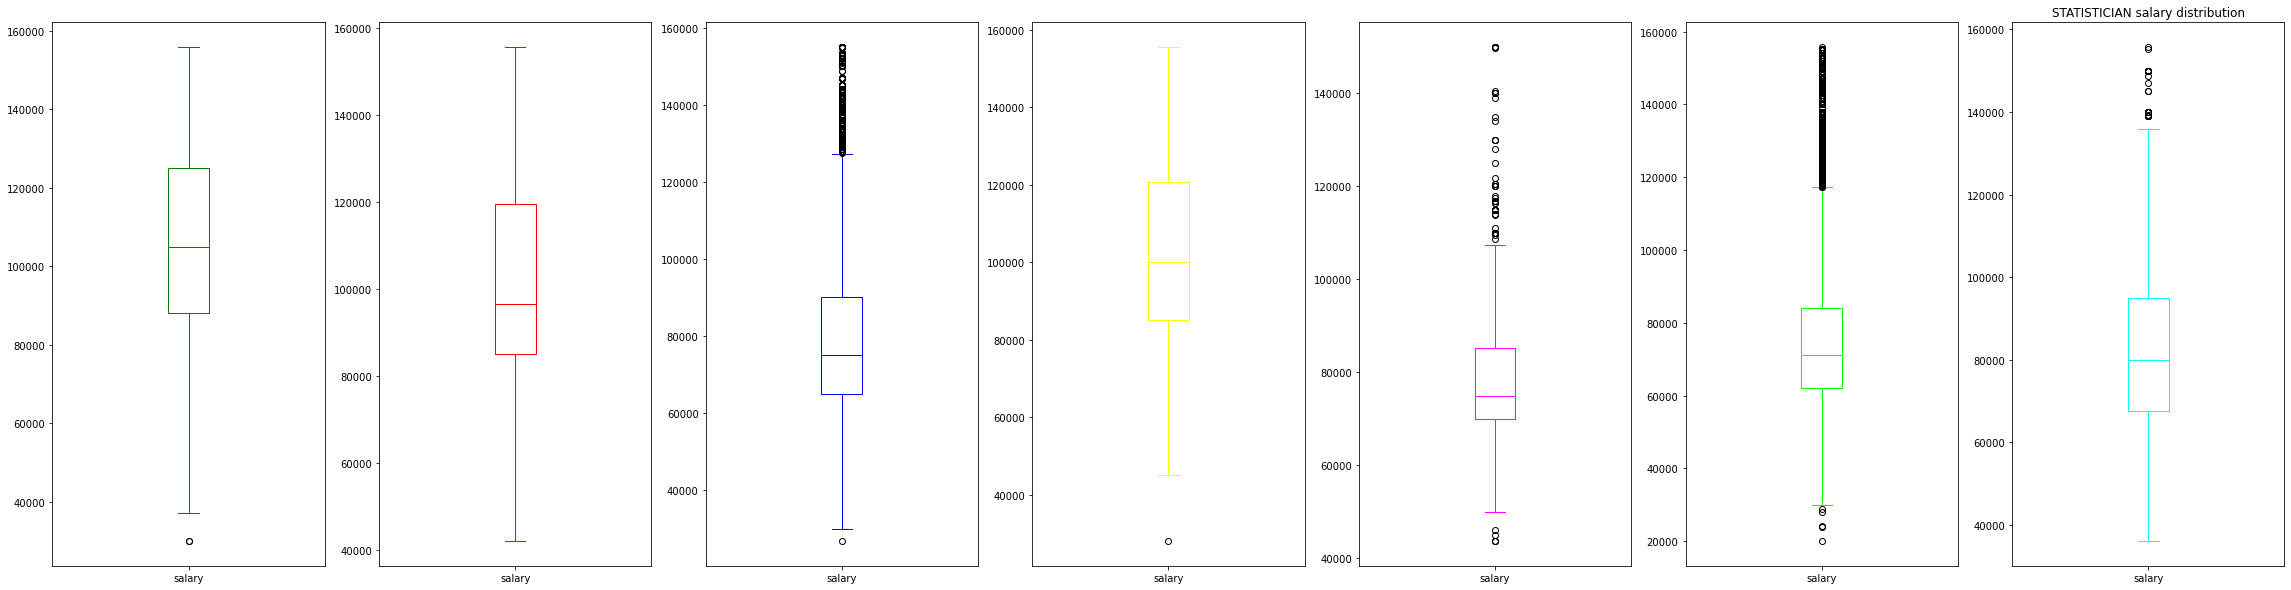

In [20]:
fig, axs = plt.subplots(1,7, figsize=(40,10))
fig.set_facecolor('white')
for (i,job) in zip(range(0, len(DS_JOBS) ), DS_JOBS):
  tmp_df = h1bdata_df[ h1bdata_df['title']== job ]['salary']
  tmp_df.plot(kind='box', ax= axs[i],color=MY_COLORS[i])
  plt.title(f"{job} salary distribution")
 

In [21]:


h1bdata_df['title'].value_counts()

BUSINESS ANALYST    39282
DATA SCIENTIST      14888
DATA ANALYST        11605
DATA ENGINEER        9749
DATA ARCHITECT       1457
STATISTICIAN         1024
BI ANALYST            650
Name: title, dtype: int64

In [24]:
h1bdata_df['state'].unique()

array(['FL', 'CA', 'NJ', 'GA', 'IL', 'WI', 'TX', 'MA', 'MI', 'WA', 'DE',
       'MD', 'NY', 'VA', 'MO', 'NC', 'TN', 'MN', 'IN', 'PA', 'OH', 'IA',
       'AZ', 'CO', 'UT', 'LA', 'OK', 'AR', 'OR', 'KS', 'NH', 'NV', 'NE',
       'CT', 'PR', 'DC', 'KY', 'SC', 'AL', 'NM', 'MS', 'ND', 'RI', 'ID',
       'HI', 'WY', 'SD', 'VT', 'ME', 'WV', 'MT', 'AK', 'VI'], dtype=object)

In [25]:
h1bdata_df['date']

0        09/04/2020
1        18/03/2016
2        18/02/2015
3        18/02/2015
4        16/03/2017
            ...    
78650    15/07/2020
78651    18/09/2019
78652    19/08/2019
78653    16/11/2022
78654    07/07/2015
Name: date, Length: 78655, dtype: object

OK! Test Passed!